-------------
# The dataset
The first step is to get the dataset

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os

In [3]:
data_root = "/home/yannh/Documents/uni/phd/classes/pai/costum_project/dataset/raw"
data_names = [
    "J20_1MS.csv",
    "J20_02MS.csv",
    "J20_05MS.csv"
]

The dataset containing protoplanetary disk properties and resulting formed planets from this disk properties


There is 3 differents samples of the dataset. Being system with single star of 1, 0.2, and 0.05 solar masses.

In [4]:
print(data_names)

['J20_1MS.csv', 'J20_02MS.csv', 'J20_05MS.csv']


--------------
## Dataset processing
We remove the failed formed planets being, having default value of -1000.

We also sort the dataset by the disk and the planets properties


In [5]:
data_name_index = 0
data_path = os.path.join(data_root, data_names[data_name_index])

In [6]:
dataframe = pd.read_csv(data_path)
dataframe
planet_columns = ["Total Mass (Mearth)", "sma (AU)", "GCR (gas to core ratio)", "fraction water", "sma ini", "radius"]
disk_columns = ["metallicity", "gas disk (Msun)", "solid disk (Mearth)", "life time (yr)", "luminosity"]

### disk 

In [7]:
dataframe = pd.read_csv(data_path)
dataframe_gooddata = dataframe.replace(-1000, np.nan).dropna()
dataframe_disk_propriety = dataframe_gooddata.drop_duplicates(subset='System number').drop(columns=planet_columns)
dataframe_disk_propriety.head()

,System number,metallicity,gas disk (Msun),solid disk (Mearth),life time (yr),luminosity
1,1,0.009174,0.031814,101.197780,3103303.80,0.876711
20,2,0.017274,0.002482,36.993988,1198925.00,1.704304
40,3,0.024667,0.017405,214.425940,2177942.20,1.121847
60,4,0.016780,0.001077,25.748476,900505.17,2.095757
80,5,0.007195,0.010519,93.134196,1585074.10,1.402273


In [8]:
def plot_features(columns, df, name):
    for c in columns:
        fig, ax = plt.subplots(1,2, figsize=(8, 3), width_ratios=[2.5, 1])
        
        ax[0].hist(df[c], bins=100)
        ax[0].set(
            title = f"{name} property: {c}",
            xlabel=c,
            ylabel="count"
            )
        lower_quantile = df[c].quantile(0.1)
        upper_quantile = df[c].quantile(0.9)


        data_quantile = df[c][(df[c] >= lower_quantile) & (df[c] <= upper_quantile)]

                
        ax[1].hist(data_quantile, bins=100)
        ax[1].set(
            title = f"zoomed {name} property: {c}",
            xlabel=c,
            ylabel="count"
            )
        
        plt.tight_layout()
        plt.show()

In [9]:
#plot_features(disk_columns, dataframe_disk_propriety, "disks")


### planets

In [10]:
dataframe_planets_propriety = dataframe_gooddata.drop(columns=disk_columns)
dataframe_planets_propriety.head()

,System number,Total Mass (Mearth),sma (AU),GCR (gas to core ratio),fraction water,sma ini,radius
1,1,0.486966,8.437974,0.000074,0.008419,8.435899,0.093455
2,1,13.097383,0.494864,1.010360,0.011011,0.491500,0.613140
3,1,1.755973,0.114088,0.000000,0.011497,0.111442,0.101920
4,1,0.137088,0.043359,0.000000,0.006687,0.040965,0.046239
5,1,1.399879,0.219511,0.000000,0.014709,0.214822,0.096246


In [11]:
#plot_features(planet_columns, dataframe_planets_propriety, "planets")

## Creation of the first simple labels
A first draft of labels will be created:
- the total number of planets in each system
- the number of failed formed planets ?
- the total mass of the planets 

In [12]:
dataframe_planets_propriety.head()

,System number,Total Mass (Mearth),sma (AU),GCR (gas to core ratio),fraction water,sma ini,radius
1,1,0.486966,8.437974,0.000074,0.008419,8.435899,0.093455
2,1,13.097383,0.494864,1.010360,0.011011,0.491500,0.613140
3,1,1.755973,0.114088,0.000000,0.011497,0.111442,0.101920
4,1,0.137088,0.043359,0.000000,0.006687,0.040965,0.046239
5,1,1.399879,0.219511,0.000000,0.014709,0.214822,0.096246


In [13]:
planet_counts = dataframe_planets_propriety['System number'].value_counts().sort_index()
print(planet_counts)

System number
1        18
2        17
3        17
4        20
5        18
         ..
19996    15
19997    20
19998    20
19999    20
20000    19
Name: count, Length: 19473, dtype: int64


In [14]:
total_mass_sum = dataframe_planets_propriety.groupby('System number')['Total Mass (Mearth)'].sum()
print(total_mass_sum)

System number
1         26.372119
2          3.912124
3        199.659274
4          0.992856
5         10.671086
            ...    
19996    237.162848
19997      1.005541
19998      8.170006
19999     14.160703
20000      5.803011
Name: Total Mass (Mearth), Length: 19473, dtype: float64


In [15]:
data = pd.DataFrame(dataframe_disk_propriety)
data = data.join(planet_counts, on='System number')
data = data.join(total_mass_sum, on='System number')
print(dataframe_disk_propriety.shape, planet_counts.shape, total_mass_sum.shape, data.shape)

(19473, 6) (19473,) (19473,) (19473, 8)


In [16]:
data.head()

,System number,metallicity,gas disk (Msun),solid disk (Mearth),life time (yr),luminosity,count,Total Mass (Mearth)
1,1,0.009174,0.031814,101.197780,3103303.80,0.876711,18,26.372119
20,2,0.017274,0.002482,36.993988,1198925.00,1.704304,17,3.912124
40,3,0.024667,0.017405,214.425940,2177942.20,1.121847,17,199.659274
60,4,0.016780,0.001077,25.748476,900505.17,2.095757,20,0.992856
80,5,0.007195,0.010519,93.134196,1585074.10,1.402273,18,10.671086


In [17]:
# Shuffle the dataframe
data = data.drop(labels="System number", axis=1)
data.head()

,metallicity,gas disk (Msun),solid disk (Mearth),life time (yr),luminosity,count,Total Mass (Mearth)
1,0.009174,0.031814,101.197780,3103303.80,0.876711,18,26.372119
20,0.017274,0.002482,36.993988,1198925.00,1.704304,17,3.912124
40,0.024667,0.017405,214.425940,2177942.20,1.121847,17,199.659274
60,0.016780,0.001077,25.748476,900505.17,2.095757,20,0.992856
80,0.007195,0.010519,93.134196,1585074.10,1.402273,18,10.671086


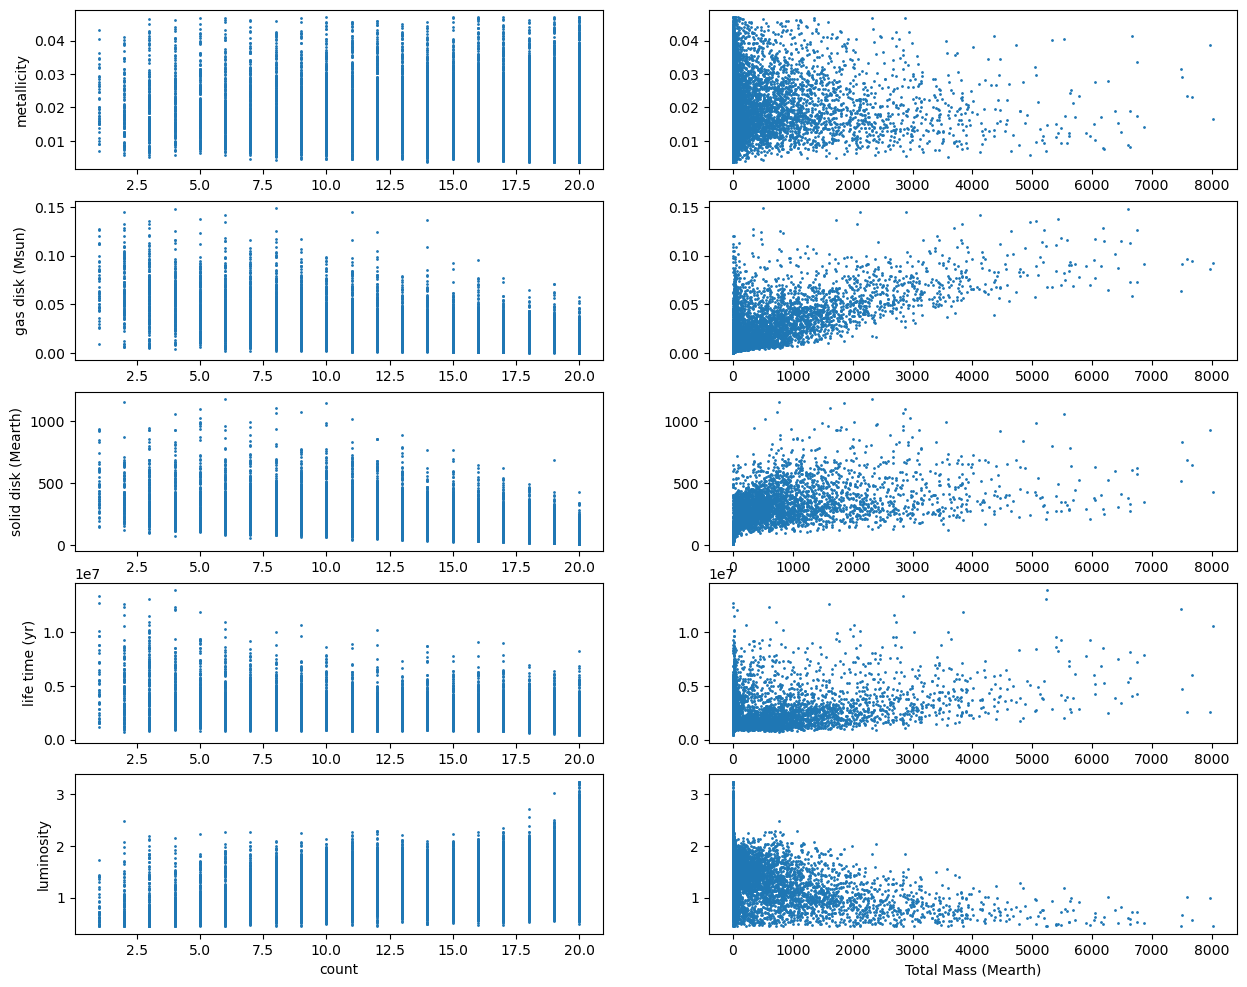

In [18]:
# we can look for correlation in the data and the label already

fig, ax = plt.subplots(len(disk_columns), 2, figsize=(15, 12))

for i_dc, dc in enumerate(disk_columns):
    
    ax[i_dc, 0].set(
        ylabel=dc
    )
    ax[i_dc, 0].scatter(data["count"], data[dc], s=1)
    ax[i_dc, 1].scatter(data["Total Mass (Mearth)"], data[dc], s=1)

ax[-1, 0].set(
    xlabel="count"
)
ax[-1, 1].set(
    xlabel="Total Mass (Mearth)"
)

plt.show()
    

In [19]:
dataframe_gooddata.tail(10)

,System number,Total Mass (Mearth),sma (AU),metallicity,GCR (gas to core ratio),fraction water,gas disk (Msun),solid disk (Mearth),life time (yr),sma ini,radius,luminosity
389569,20000,0.348694,3.683163,0.01046,0.000000,0.009833,0.003578,76.527543,1217603.6,3.679740,0.077701,1.686393
389570,20000,0.095928,5.807407,0.01046,0.000000,0.008544,0.003578,76.527543,1217603.6,5.793644,0.052796,1.686393
389571,20000,0.348548,0.417532,0.01046,0.000000,0.013437,0.003578,76.527543,1217603.6,0.416546,0.062495,1.686393
389572,20000,0.018652,21.964439,0.01046,0.000000,0.006319,0.003578,76.527543,1217603.6,21.962205,0.030911,1.686393
389573,20000,0.065624,6.921942,0.01046,0.000000,0.008451,0.003578,76.527543,1217603.6,6.916569,0.046493,1.686393
389574,20000,0.152278,0.189171,0.01046,0.000000,0.006815,0.003578,76.527543,1217603.6,0.188839,0.047655,1.686393
389575,20000,0.668204,0.740980,0.01046,0.000000,0.012795,0.003578,76.527543,1217603.6,0.738215,0.076714,1.686393
389577,20000,0.041621,0.094488,0.01046,0.000000,0.006551,0.003578,76.527543,1217603.6,0.094312,0.031157,1.686393
389578,20000,0.359338,1.444454,0.01046,0.000000,0.018366,0.003578,76.527543,1217603.6,1.432915,0.063424,1.686393
389579,20000,1.102244,1.922302,0.01046,0.000775,0.015121,0.003578,76.527543,1217603.6,1.910799,0.115763,1.686393


19473


/tmp/ipykernel_72893/205623909.py:13: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  sma[l] = system.iloc[[l]]["sma (AU)"]
/tmp/ipykernel_72893/205623909.py:14: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  radius[l] = system.iloc[[l]]["radius"]
/tmp/ipykernel_72893/205623909.py:15: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  mass[l] = system.iloc[[l]]["Total Mass (Mearth)"]


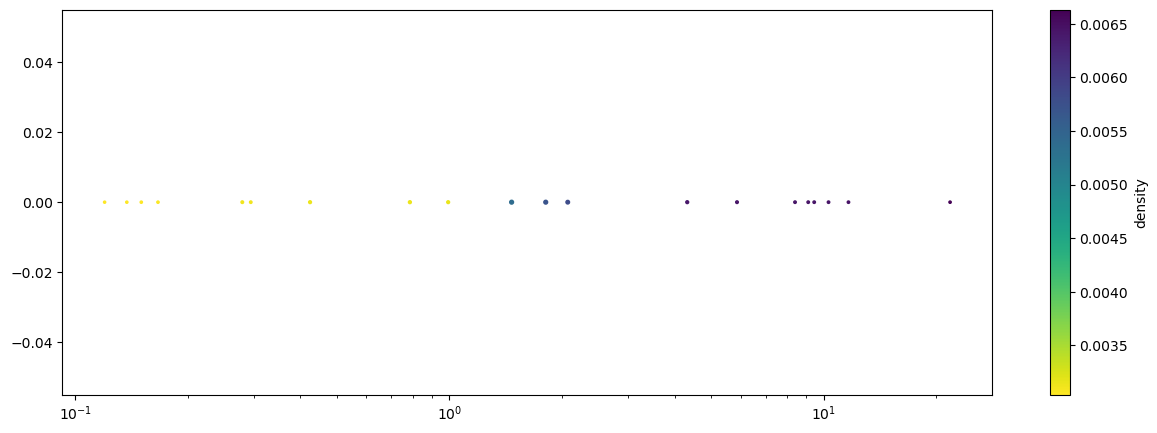

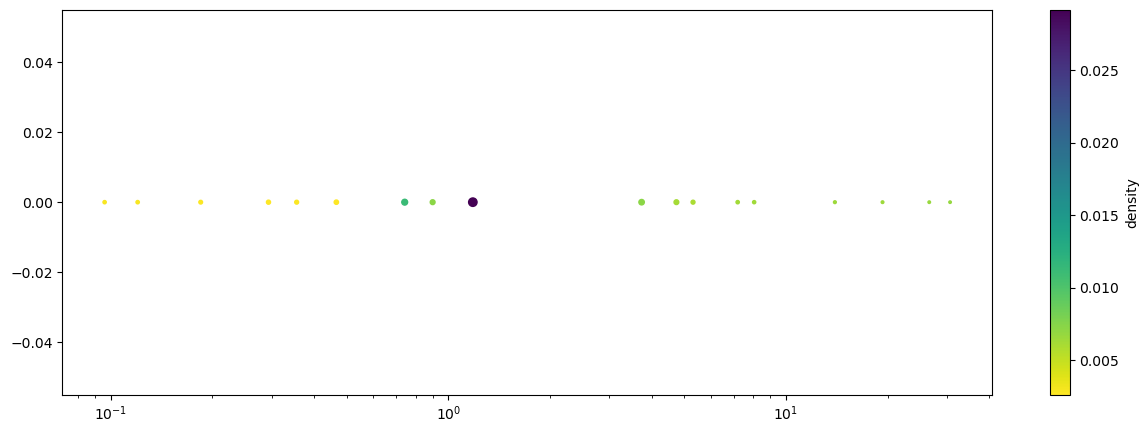

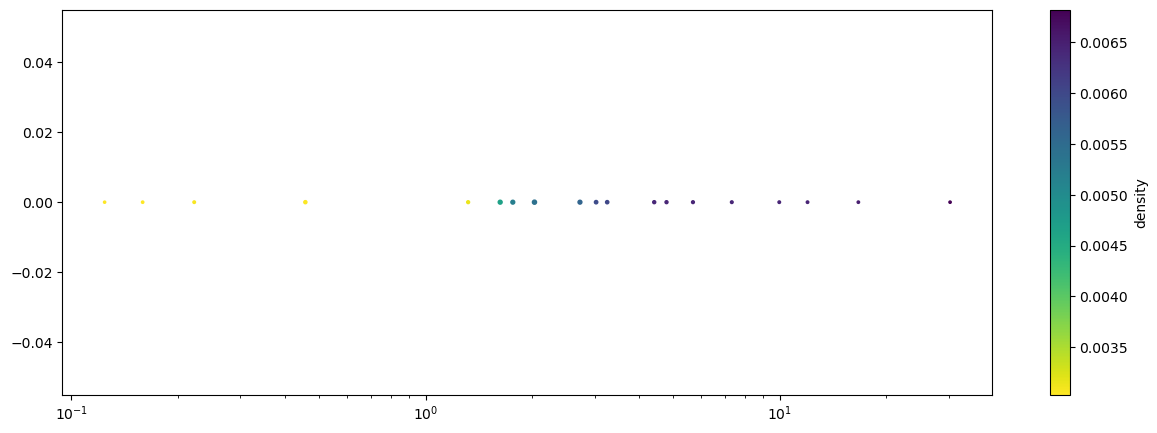

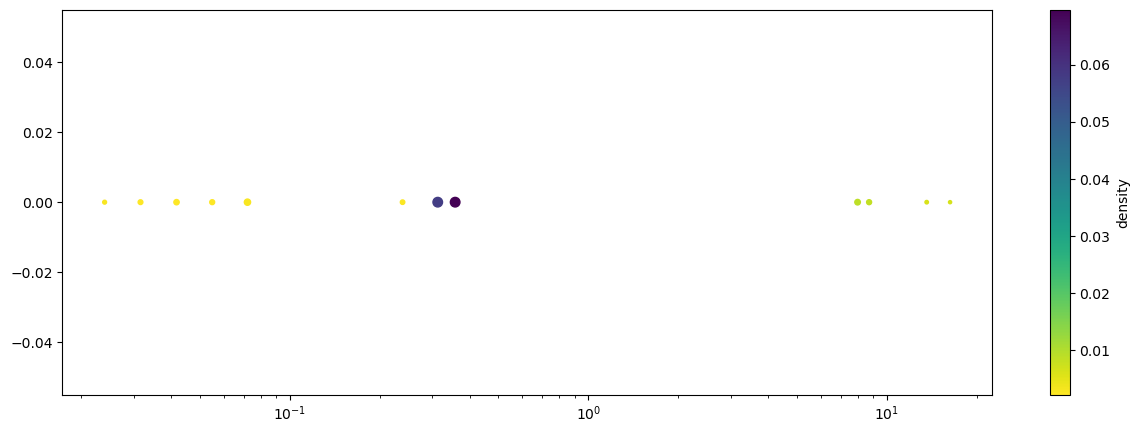

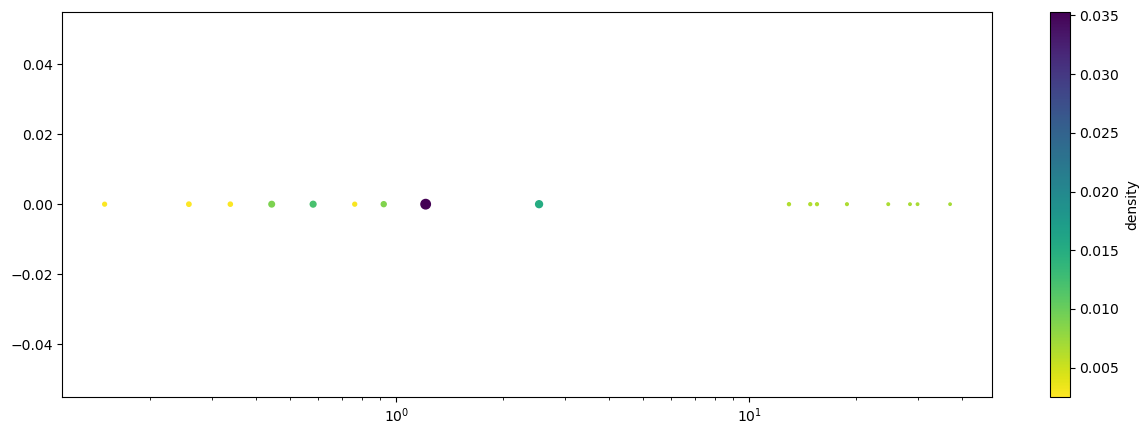

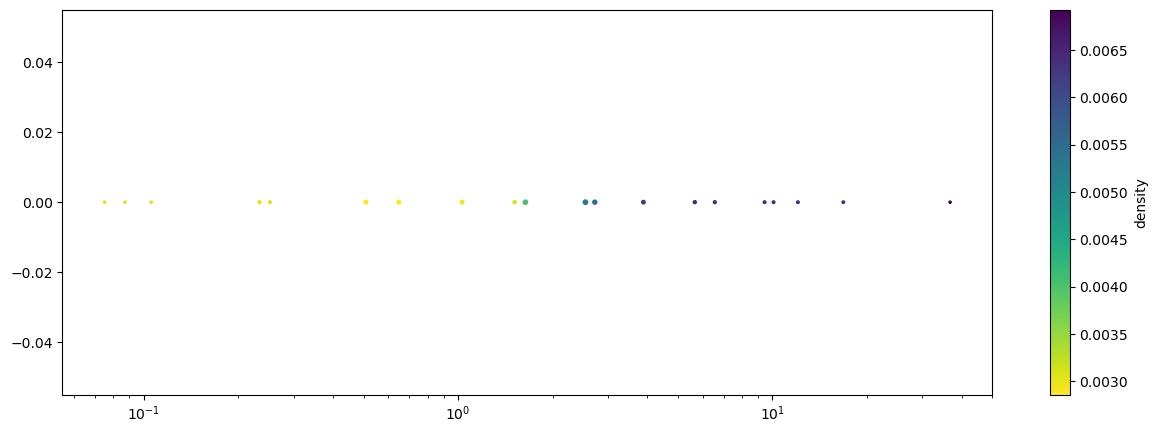

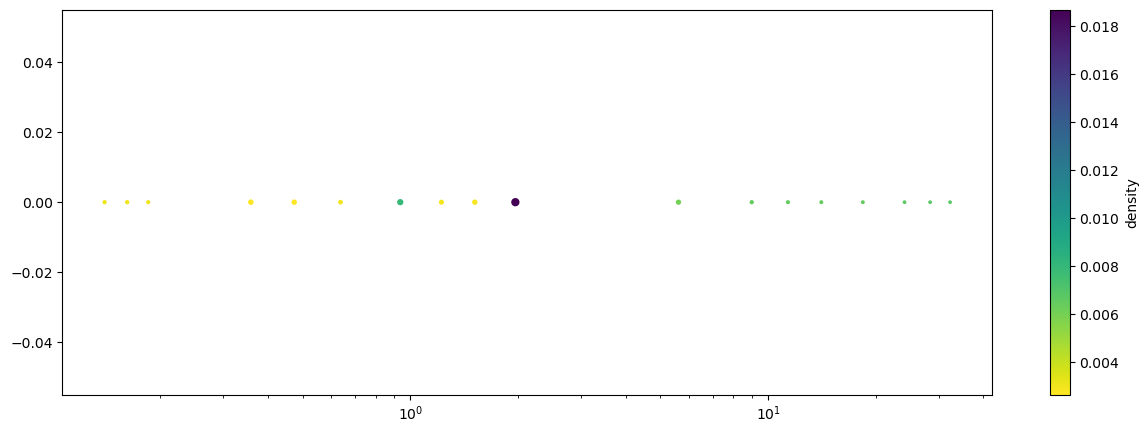

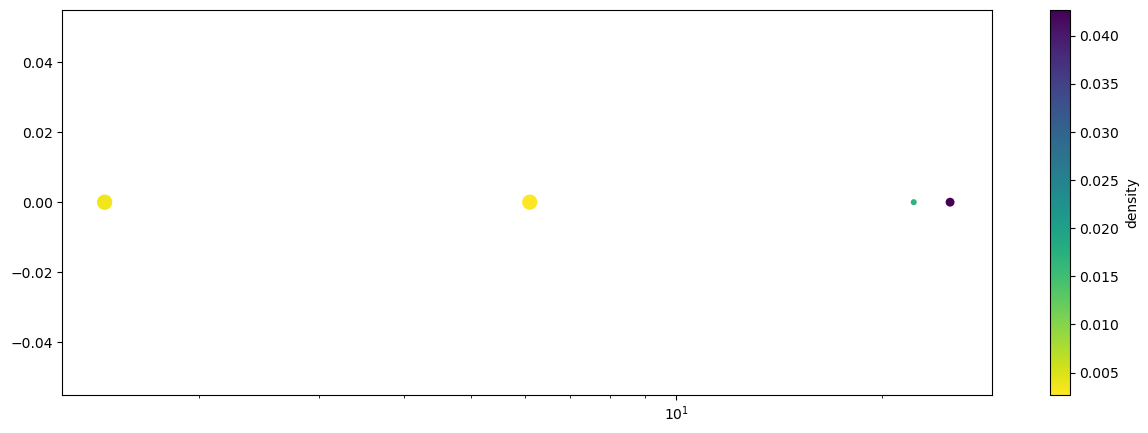

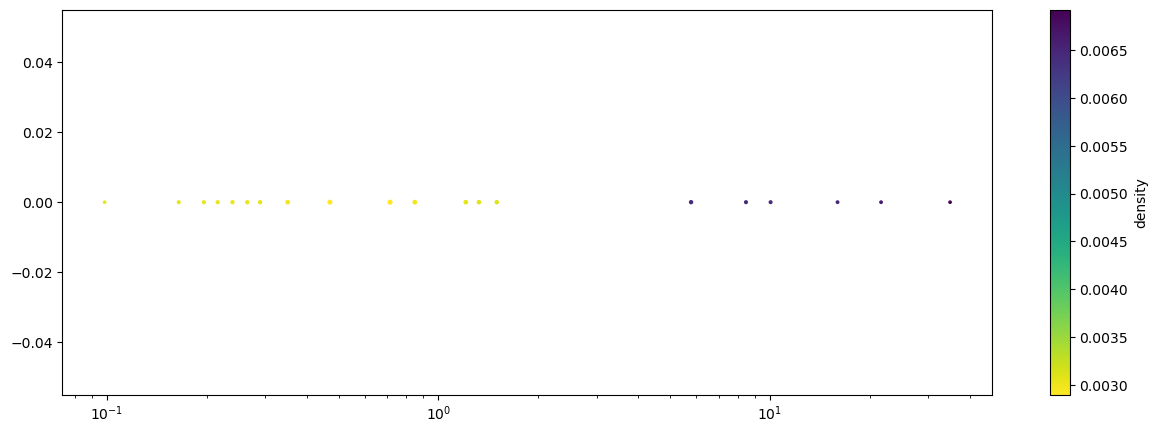

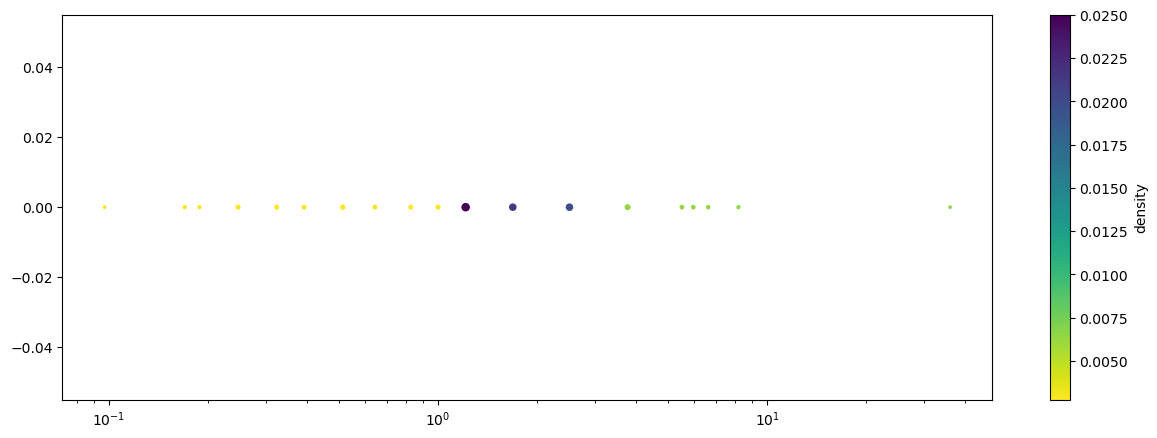

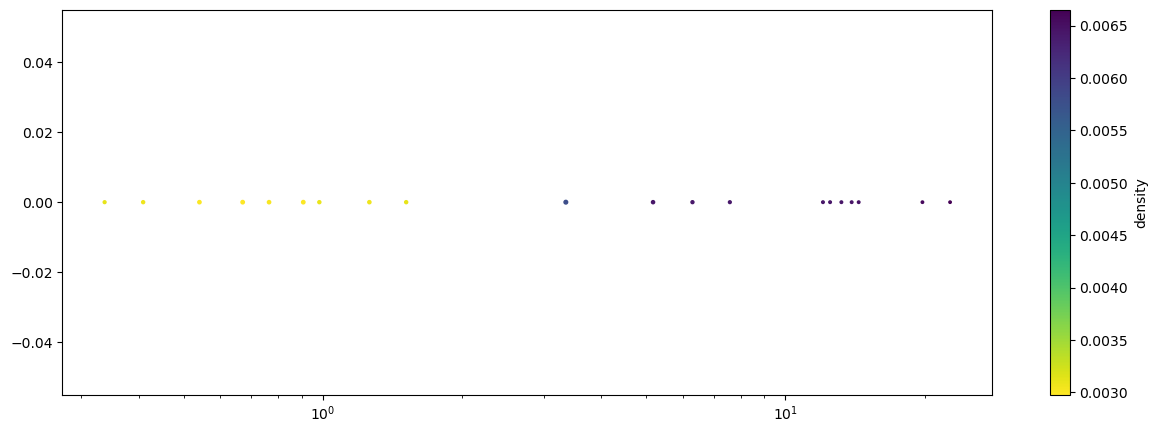

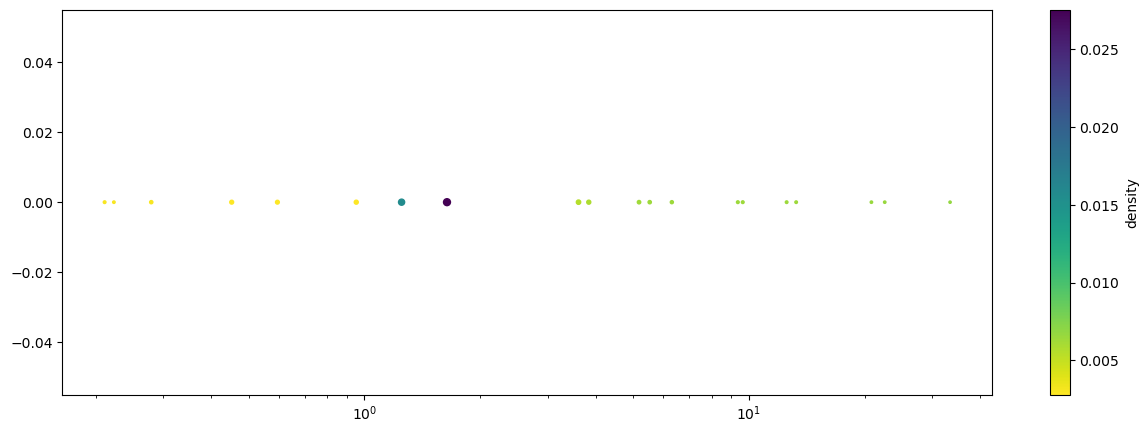

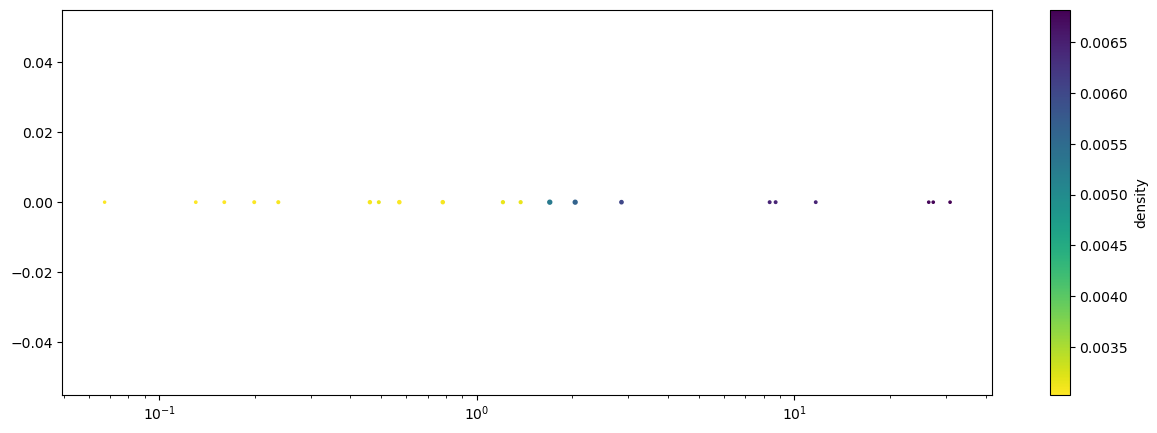

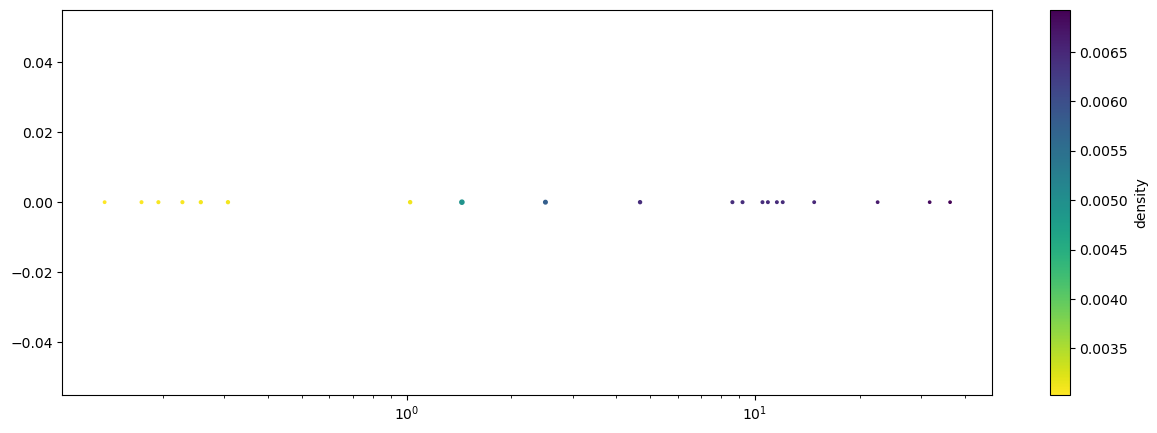

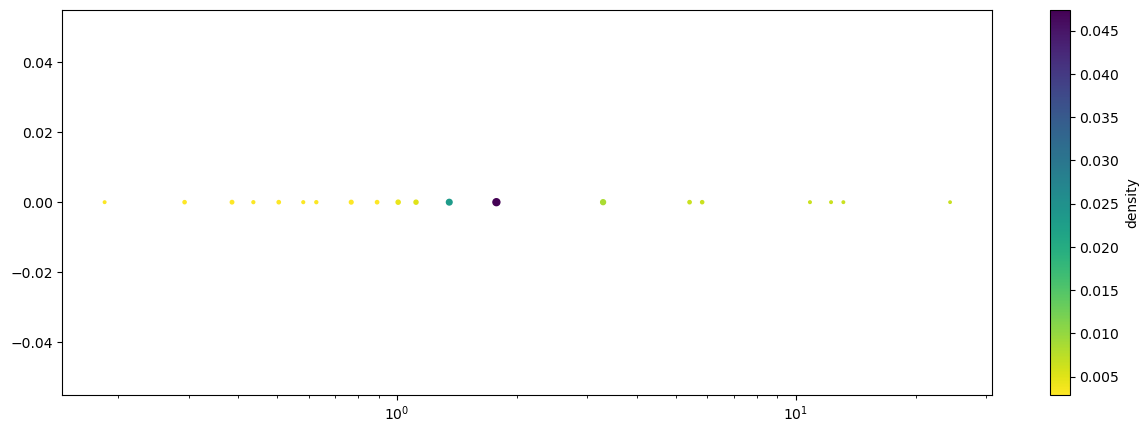

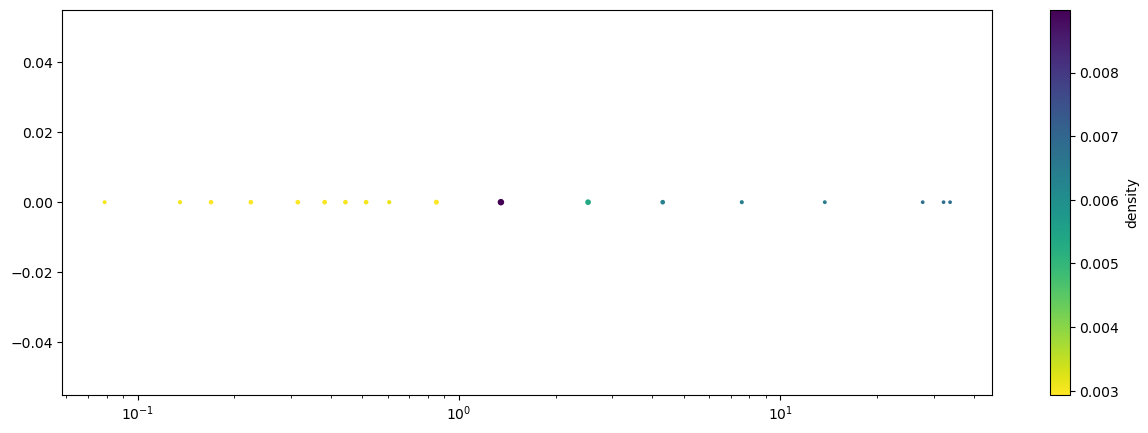

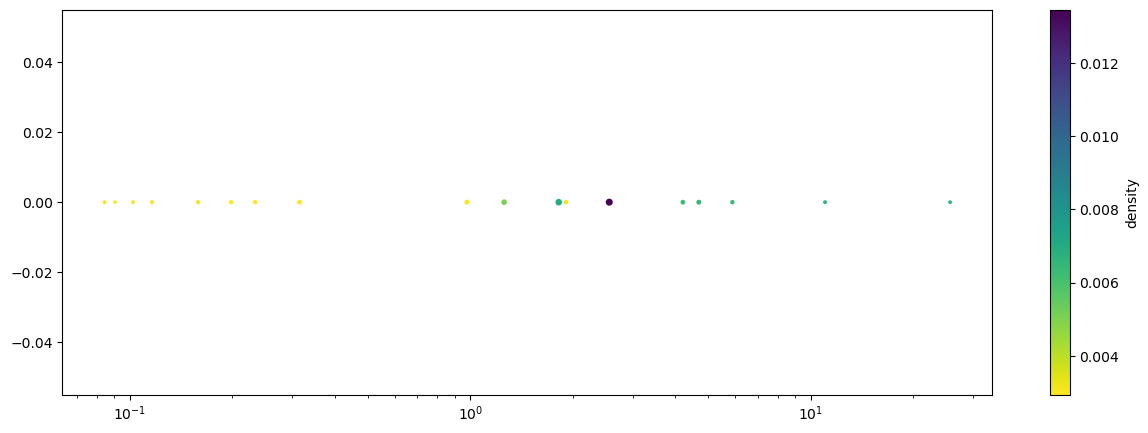

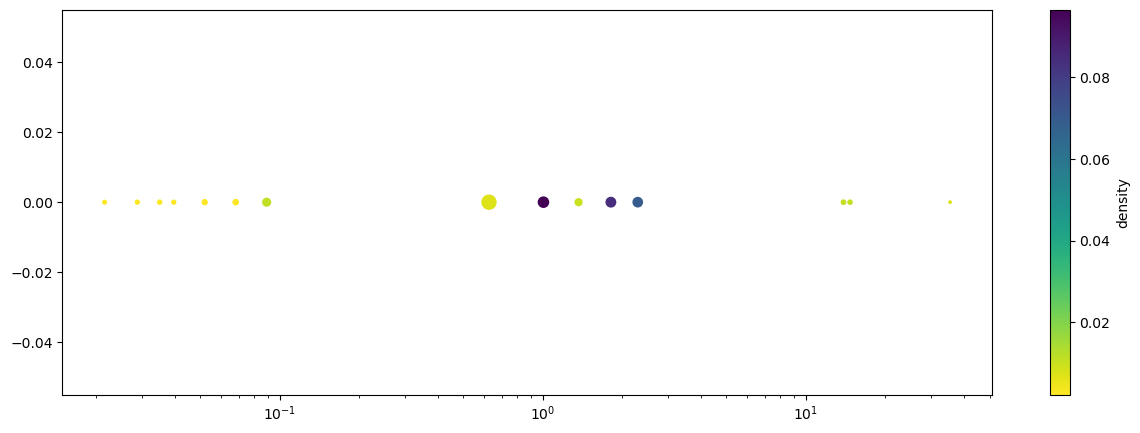

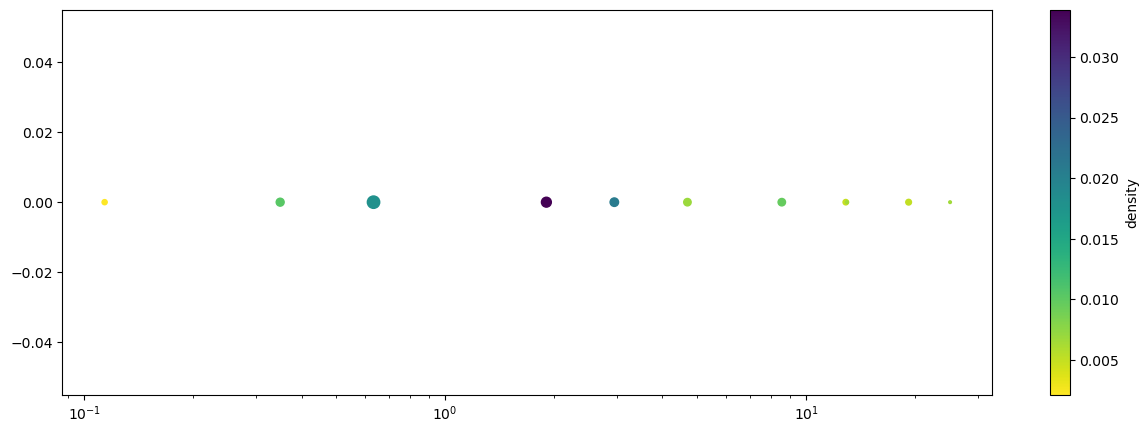

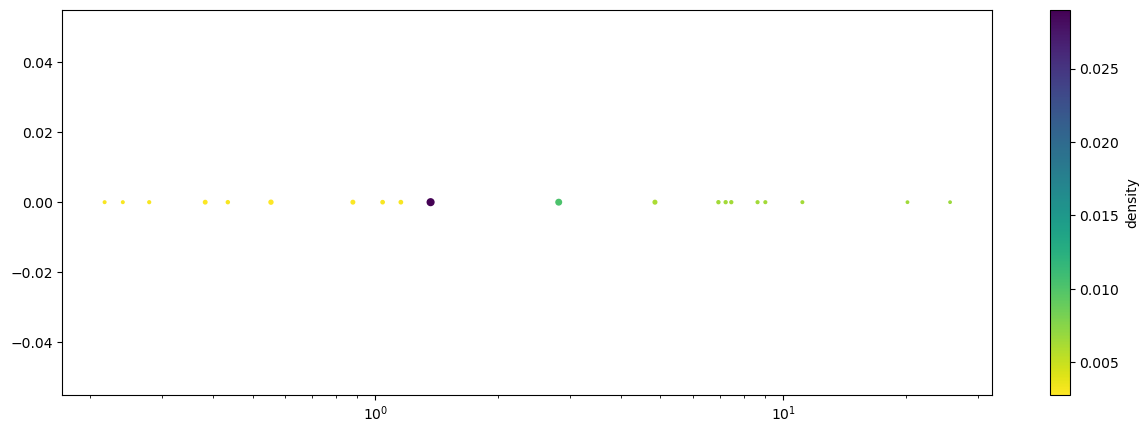

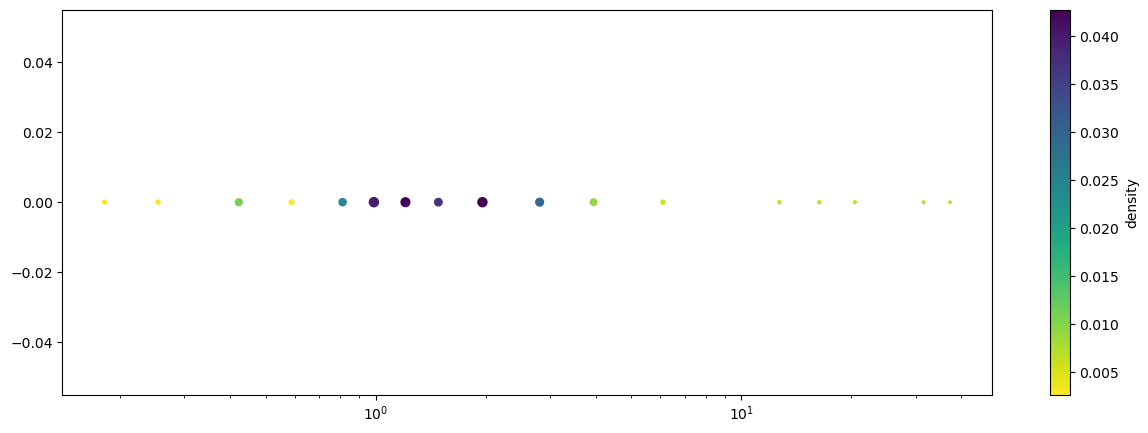

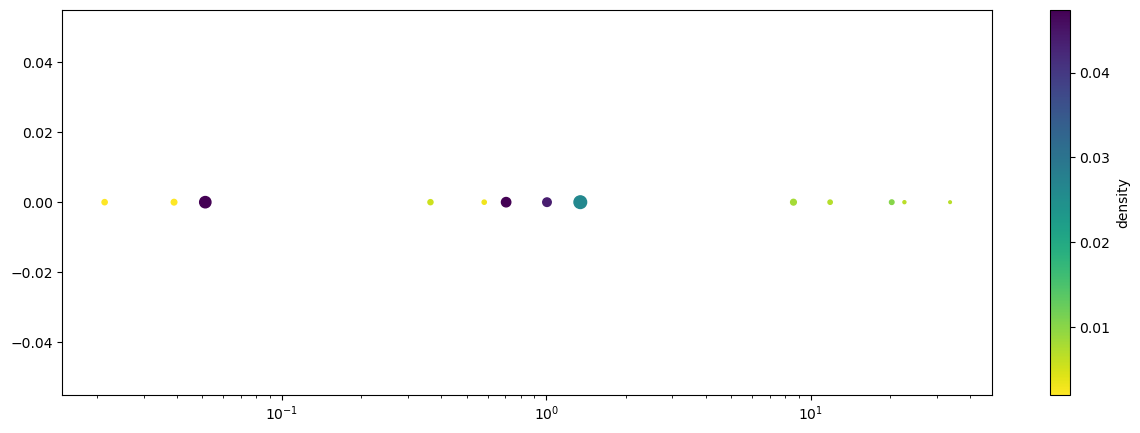

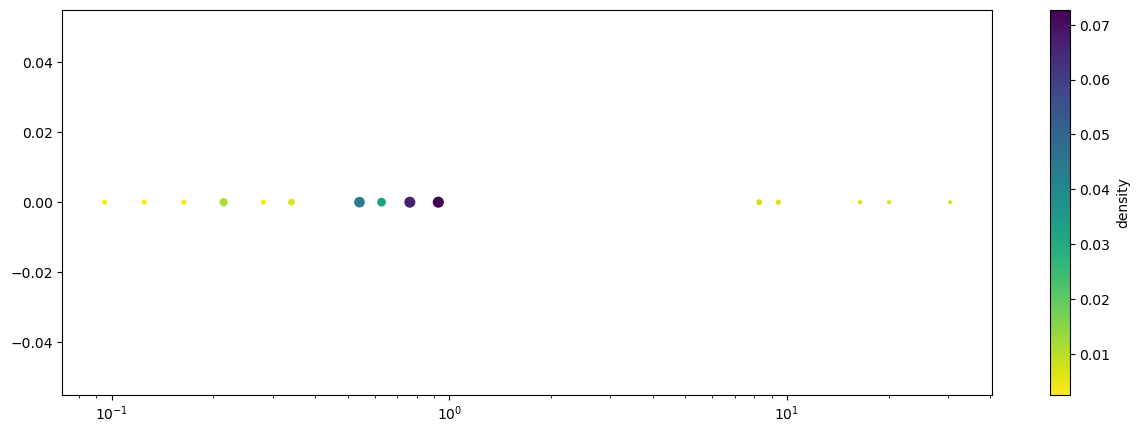

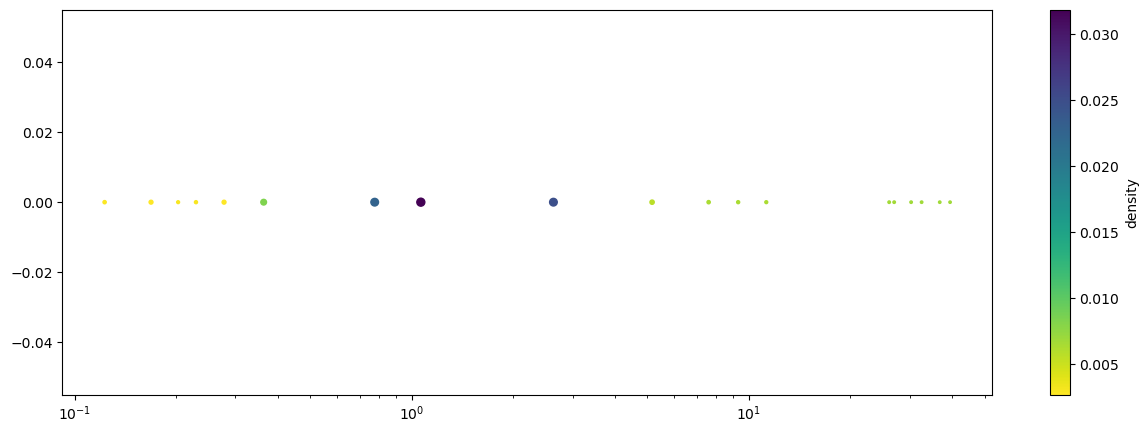

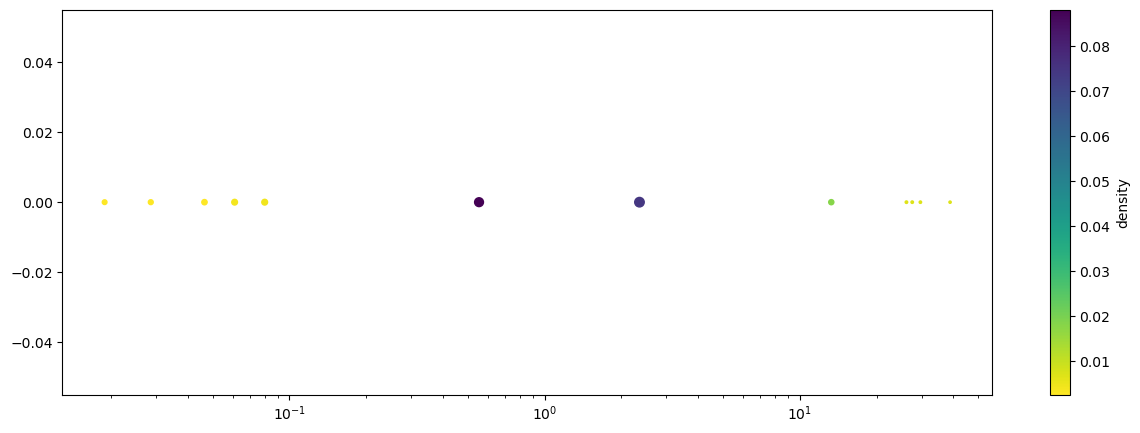

In [29]:
for i in np.random.choice(pd.unique(dataframe_gooddata["System number"]), size=25):
    system = dataframe_gooddata[dataframe_gooddata["System number"] == i]
    fig, ax = plt.subplots(1,1, figsize=(15, 5))
    n_planets = system.shape[0]
    density = np.empty(n_planets)
    sma = np.empty(n_planets)
    density = np.empty(n_planets)
    radius = np.empty(n_planets)
    mass = np.empty(n_planets)
    
    for l in range(system.shape[0]):
        #print(system.iloc[[l]])
        sma[l] = system.iloc[[l]]["sma (AU)"]
        radius[l] = system.iloc[[l]]["radius"]
        mass[l] = system.iloc[[l]]["Total Mass (Mearth)"]
    density = 4/3 * np.pi * radius**3 /mass
    cbar_target = ax.scatter(sma, np.zeros_like(sma), s=100*radius, c=density, cmap="viridis_r")
    fig.colorbar(cbar_target, label = "density")
    ax.set_xscale("log")
    plt.show()

